In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib as mpl

In [2]:
k = 10
cols=['alpha', 'q0', 'q1', 'm0','m1','V0','V1','FEn','Energy','Entropy','TrError'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

# Finite temperature

## Import Data

### Error function data

## Plots

<>:231: SyntaxWarning: invalid escape sequence '\e'
<>:237: SyntaxWarning: invalid escape sequence '\e'
<>:238: SyntaxWarning: invalid escape sequence '\e'
<>:239: SyntaxWarning: invalid escape sequence '\e'
<>:231: SyntaxWarning: invalid escape sequence '\e'
<>:237: SyntaxWarning: invalid escape sequence '\e'
<>:238: SyntaxWarning: invalid escape sequence '\e'
<>:239: SyntaxWarning: invalid escape sequence '\e'
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_3999/533309569.py:231: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error_3, f'{branch_name_after_metastable} ($\epsilon_g$)'))
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_3999/533309569.py:237: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error, f'{branch_name_after_stable}($\epsilon_g$)'))
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_3999/533309569.py:238: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((error_p

relu 1.18
erf 12.23


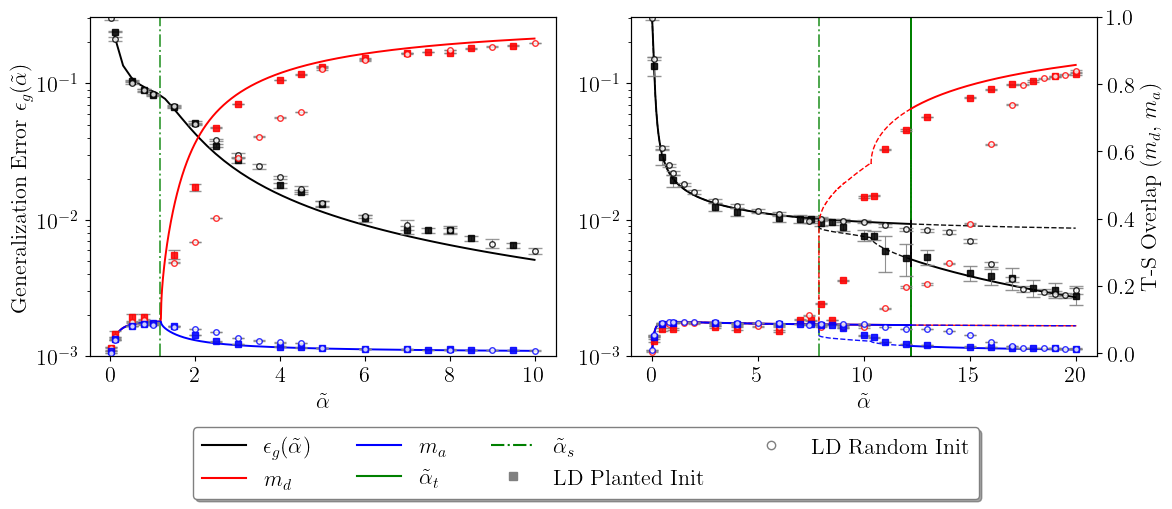

In [7]:
activ_function = ['relu', 'erf']

fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'o', 'D']
alpha_list = np.linspace(1.0,0.8, 4)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = r"LD Random Init"
LD_name_init_planted = "LD Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.4
linewidth_theory_meta = 1.0
fontsize=13
color_num="white"
color_num_planted="orange"
vertical_line_color="green" #"magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []



planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'relu':1.18, 'erf':12.23}
vertical_line = {"erf":[4.6e-3, 1e-2]}




# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
alpha_first_t = 7.9
y1_max=1.0
y1_min=-0.01
yline = np.linspace(y1_min, y1_max, 900)  # Define y-axis range

#ax1.set_xlabel(r'$\tilde{\alpha}$')
#ax1.set_ylabel(r'$\epsilon_g$')
# -- Transition -- 
#plt.axvline(12.23, color= 'lightgray')

# Plot on ax1 - ERROR
# -- non specialized sol -- 
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})

for i, key in enumerate(activ_function):
    
    alpha_t = alpha_t_list[key]
    print(key,alpha_t)
    
    
    if len(activ_function)>1: 
        ax1=axes[i]
        #ax1.grid(True)
    
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
    #ax1.axvline(alpha_t, color=vertical_line_color, linewidth=linewidth_theory)
    
    ###Vertical line
    if key=="erf":
        colors = np.where(yline <= vertical_line[key][0], vertical_line_color, np.where(yline <=  vertical_line[key][1],
                                                                                                 error_color, vertical_line_color))
        for i in range(len(yline) - 1):
            ax1.plot([alpha_t, alpha_t], [yline[i], yline[i + 1]], color=colors[i], linewidth=linewidth_theory)
    

    #THEORY 
    Th_directory = f"{key}_beta10_lambda0p1/Theory/"
    
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
    if key=="erf":
        TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
        ax1.axvline(alpha_first_t, color=vertical_line_color, linestyle='-.', alpha=0.7, linewidth=linewidth_theory)

        
        
    
    # Error
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None)
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)
    if key=="erf":
        error_2 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)

    # EXPERIMENTS
    Ex_directory = f"{key}_beta10_lambda0p1/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt', names=colsN, header=None,sep=' ')

    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]<alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]<alpha_t], '-', color='k')
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]>alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]>alpha_t], '--', color='gray')


    # -- specialized sol -- 
    #(unstable_error,) = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_memo])
    if key=="relu":
        spe_error = ax1.semilogy(error_1[xvar],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        ax1.axvline(alpha_t, color=vertical_line_color, linestyle='-.', alpha=0.7, linewidth=linewidth_theory)
    elif key=="erf":
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t],  error_1['val'][error_1[xvar]>alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t],  error_0['val'][error_0[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))


    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], 0.5*error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    error_random = ax1.errorbar(error_random['alpha'], 0.5*error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    ax1.tick_params(axis='y')
    
    if i == 0:
        ax1.set_ylabel(r"Generalization Error $\epsilon_g (\tilde{\alpha})$") #,fontsize=fontsize)
        
    #ax1.text(0.05, 0.95, f'({chr(97+i)})', transform=ax1.transAxes, 
    #            fontsize=14, va='top')
    

    # Twin axes for ax2
    ax2 = ax1.twinx()
    ax2.set_ylim(y1_min, y1_max)
    #ax2.grid(True)
    
    if key=="erf":
        ax2.set_ylabel(r'T-S Overlap ($m_d$, $m_a$)') #,fontsize=fontsize)
    else:
        ax2.set_yticks([])

    # -- specialized sol -- 
    if key=="relu":
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'] + TS_1['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar], TS_1['m1'] / k, markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
        overlap_max_list.append(max(TS_1['m0'] + TS_1['m1'] / k))
        overlap_min_list.append(min(TS_1['m1'] / k))
        
    elif key=="erf":
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t], TS_1['m0'][TS_1[xvar]>alpha_t] + TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t], TS_1['m0'][TS_1[xvar]<alpha_t] + TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory_meta)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t], TS_0['m0'][TS_0[xvar]<alpha_t] + TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m0'][TS_0[xvar]>alpha_t] + TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t],TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t],TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t],TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        overlap_max_list.append(max([max(TS_1['m0'] + TS_1['m1'] / k), max(TS_0['m0'] + TS_0['m1'] / k)]))
        overlap_min_list.append(min([min(TS_1['m0'] + TS_1['m1'] / k), min(TS_0['m0'] + TS_0['m1'] / k)]))
        
        
    


    # -- experiments --
    
    #Diagonal
    planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
    random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                       alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)

    #OffDiagonal
    planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=off_ts_color, markersize=m_size,
                                       alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
    random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=color_num, markersize=m_size,
                                      alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
    #ax2.tick_params(axis='y')
    
    if key=="erf":
            legend_elements.append((spe_error_3, f'{branch_name_after_metastable} ($\epsilon_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            legend_elements.append((unstable_diag_overlap, r'{}  $m_d$'.format(branch_name_after_metastable)))

    
    if i == 0:
        legend_elements.append((spe_error, f'{branch_name_after_stable}($\epsilon_g$)'))
        legend_elements.append((error_planted, f'{LD_name_init_planted} ($\epsilon_g$)')) 
        legend_elements.append((error_random, f'{LD_name_init_random} ($\epsilon_g$)'))
        
        
        #legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
        legend_elements.append((spe_diag_overlap, r'{} $m_d$'.format(branch_name_after_stable)))
        legend_elements.append((spe_off_overlap, r'{} $m_a$'.format(branch_name_after_stable)))
        
        legend_elements.append((planted_diag_overlap, r'{} $m_d$'.format(LD_name_init_planted)))
        legend_elements.append((random_diag_overlap, r'{} $m_d$'.format(LD_name_init_random)))
        legend_elements.append((planted_off_overlap, r'{} $m_a$'.format(LD_name_init_planted)))
        legend_elements.append((random_off_overlap, r'{} $m_a$'.format(LD_name_init_random)))
    
    ax1.set_xlabel(r'$\tilde{\alpha}$') #, fontsize=fontsize)
    ax1.set_label("")
    
    
    
# Set the same y-axis limits
y_min = min(error_min_list)  # Find minimum y value
y_min=1e-3
y_max = max(error_max_list)  # Find maximum y value
y1_min = min(overlap_max_list)
y1_max = max(overlap_min_list)

for i, key in enumerate(activ_function):
    axes[i].set_ylim(y_min, y_max)
    
    #ax2 = axes[i].twinx()
    #ax2.set_ylim(y1_max, y1_min)
    
    # Reuse or create twin
    """if axes[i].twins:
        ax2 = ax1[i].twins[0]
    else:
        ax2 = axes[i].twinx()
    
    ax2.set_ylim(y1_min, y1_max)"""
    
    


#ax2.tick_params(axis='y')
legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g (\tilde{\alpha})$'),
    mlines.Line2D([], [], color=diag_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_d$'),
    mlines.Line2D([], [], color=off_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_a$'),
    mlines.Line2D([], [], color=vertical_line_color, linestyle='-', label=r' $\tilde{\alpha}_t$'),
    mlines.Line2D([], [], color=vertical_line_color, linestyle='-.', label=r' $\tilde{\alpha}_s$'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.5)

# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

#axes[0].legend(handles, labels, ncol=2, frameon=True, loc='right', bbox_to_anchor=(1.014, 0.64))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

"""# Enable LaTeX rendering globally
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # or 'sans-serif', 'monospace'
    "axes.formatter.useoffset": False,
})"""

# Legend outside the plot, centered below
legend = fig.legend(
    handles, 
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=4,
    frameon=True,
    shadow=True,
    fancybox=True
)
legend.get_frame().set_edgecolor('gray')

# Layout and show
plt.tight_layout(rect=[0, 0.1, 1, 1])




# Save figure
#plt.savefig("finite_temperature_erf_relu_new.pdf", bbox_inches='tight', dpi=300)
plt.show()

<>:231: SyntaxWarning: invalid escape sequence '\e'
<>:237: SyntaxWarning: invalid escape sequence '\e'
<>:238: SyntaxWarning: invalid escape sequence '\e'
<>:239: SyntaxWarning: invalid escape sequence '\e'
<>:231: SyntaxWarning: invalid escape sequence '\e'
<>:237: SyntaxWarning: invalid escape sequence '\e'
<>:238: SyntaxWarning: invalid escape sequence '\e'
<>:239: SyntaxWarning: invalid escape sequence '\e'
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_98137/4123057030.py:231: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error_3, f'{branch_name_after_metastable} ($\epsilon_g$)'))
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_98137/4123057030.py:237: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error, f'{branch_name_after_stable}($\epsilon_g$)'))
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_98137/4123057030.py:238: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((e

relu 1.18
erf 12.23


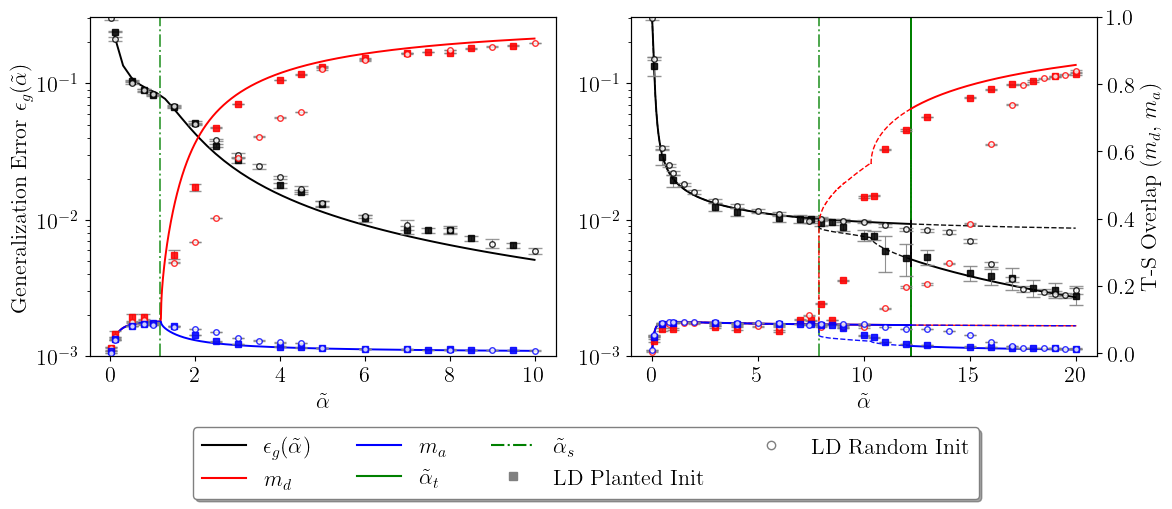

In [68]:
activ_function = ['relu', 'erf']

fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'o', 'D']
alpha_list = np.linspace(1.0,0.8, 4)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = r"LD Random Init"
LD_name_init_planted = "LD Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.4
linewidth_theory_meta = 1.0
fontsize=13
color_num="white"
color_num_planted="orange"
vertical_line_color="green" #"magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []



planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'relu':1.18, 'erf':12.23}
vertical_line = {"erf":[4.6e-3, 1e-2]}

"""mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 10,   # adjust to match NeurIPS font size
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
})"""




# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
alpha_first_t = 7.9
y1_max=1.0
y1_min=-0.01
yline = np.linspace(y1_min, y1_max, 900)  # Define y-axis range

#ax1.set_xlabel(r'$\tilde{\alpha}$')
#ax1.set_ylabel(r'$\epsilon_g$')
# -- Transition -- 
#plt.axvline(12.23, color= 'lightgray')

# Plot on ax1 - ERROR
# -- non specialized sol -- 
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})
for i, key in enumerate(activ_function):
    
    alpha_t = alpha_t_list[key]
    print(key,alpha_t)
    
    
    if len(activ_function)>1: 
        ax1=axes[i]
        #ax1.grid(True)
    
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
    #ax1.axvline(alpha_t, color=vertical_line_color, linewidth=linewidth_theory)
    
    ###Vertical line
    if key=="erf":
        colors = np.where(yline <= vertical_line[key][0], vertical_line_color, np.where(yline <=  vertical_line[key][1],
                                                                                                 error_color, vertical_line_color))
        for i in range(len(yline) - 1):
            ax1.plot([alpha_t, alpha_t], [yline[i], yline[i + 1]], color=colors[i], linewidth=linewidth_theory)
    

    #THEORY 
    Th_directory = f"{key}_beta10_lambda0p1/Theory/"
    
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
    if key=="erf":
        TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
        ax1.axvline(alpha_first_t, color=vertical_line_color, linestyle='-.', alpha=0.7, linewidth=linewidth_theory)

        
        
    
    # Error
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None)
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)
    if key=="erf":
        error_2 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)

    # EXPERIMENTS
    Ex_directory = f"{key}_beta10_lambda0p1/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt', names=colsN, header=None,sep=' ')

    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]<alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]<alpha_t], '-', color='k')
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]>alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]>alpha_t], '--', color='gray')


    # -- specialized sol -- 
    #(unstable_error,) = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_memo])
    if key=="relu":
        spe_error = ax1.semilogy(error_1[xvar],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        ax1.axvline(alpha_t, color=vertical_line_color, linestyle='-.', alpha=0.7, linewidth=linewidth_theory)
    elif key=="erf":
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t],  error_1['val'][error_1[xvar]>alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t],  error_0['val'][error_0[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))


    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], 0.5*error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    error_random = ax1.errorbar(error_random['alpha'], 0.5*error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    ax1.tick_params(axis='y')
    
    if i == 0:
        ax1.set_ylabel(r"Generalization Error $\epsilon_g (\tilde{\alpha})$") #,fontsize=fontsize)
        
    #ax1.text(0.05, 0.95, f'({chr(97+i)})', transform=ax1.transAxes, 
    #            fontsize=14, va='top')
    

    # Twin axes for ax2
    ax2 = ax1.twinx()
    ax2.set_ylim(y1_min, y1_max)
    #ax2.grid(True)
    
    if key=="erf":
        ax2.set_ylabel(r'T-S Overlap ($m_d$, $m_a$)') #,fontsize=fontsize)
    else:
        ax2.set_yticks([])

    # -- specialized sol -- 
    if key=="relu":
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'] + TS_1['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar], TS_1['m1'] / k, markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
        overlap_max_list.append(max(TS_1['m0'] + TS_1['m1'] / k))
        overlap_min_list.append(min(TS_1['m1'] / k))
        
    elif key=="erf":
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t], TS_1['m0'][TS_1[xvar]>alpha_t] + TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t], TS_1['m0'][TS_1[xvar]<alpha_t] + TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory_meta)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t], TS_0['m0'][TS_0[xvar]<alpha_t] + TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m0'][TS_0[xvar]>alpha_t] + TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t],TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t],TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t],TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        overlap_max_list.append(max([max(TS_1['m0'] + TS_1['m1'] / k), max(TS_0['m0'] + TS_0['m1'] / k)]))
        overlap_min_list.append(min([min(TS_1['m0'] + TS_1['m1'] / k), min(TS_0['m0'] + TS_0['m1'] / k)]))
        
        
    


    # -- experiments --
    
    #Diagonal
    planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
    random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                       alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)

    #OffDiagonal
    planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=off_ts_color, markersize=m_size,
                                       alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
    random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=color_num, markersize=m_size,
                                      alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
    #ax2.tick_params(axis='y')
    
    if key=="erf":
            legend_elements.append((spe_error_3, f'{branch_name_after_metastable} ($\epsilon_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            legend_elements.append((unstable_diag_overlap, r'{}  $m_d$'.format(branch_name_after_metastable)))

    
    if i == 0:
        legend_elements.append((spe_error, f'{branch_name_after_stable}($\epsilon_g$)'))
        legend_elements.append((error_planted, f'{LD_name_init_planted} ($\epsilon_g$)')) 
        legend_elements.append((error_random, f'{LD_name_init_random} ($\epsilon_g$)'))
        
        
        #legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
        legend_elements.append((spe_diag_overlap, r'{} $m_d$'.format(branch_name_after_stable)))
        legend_elements.append((spe_off_overlap, r'{} $m_a$'.format(branch_name_after_stable)))
        
        legend_elements.append((planted_diag_overlap, r'{} $m_d$'.format(LD_name_init_planted)))
        legend_elements.append((random_diag_overlap, r'{} $m_d$'.format(LD_name_init_random)))
        legend_elements.append((planted_off_overlap, r'{} $m_a$'.format(LD_name_init_planted)))
        legend_elements.append((random_off_overlap, r'{} $m_a$'.format(LD_name_init_random)))
    
    ax1.set_xlabel(r'$\tilde{\alpha}$') #, fontsize=fontsize)
    ax1.set_label("")
    
    
    
# Set the same y-axis limits
y_min = min(error_min_list)  # Find minimum y value
y_min=1e-3
y_max = max(error_max_list)  # Find maximum y value
y1_min = min(overlap_max_list)
y1_max = max(overlap_min_list)

for i, key in enumerate(activ_function):
    axes[i].set_ylim(y_min, y_max)
    
    #ax2 = axes[i].twinx()
    #ax2.set_ylim(y1_max, y1_min)
    
    # Reuse or create twin
    """if axes[i].twins:
        ax2 = ax1[i].twins[0]
    else:
        ax2 = axes[i].twinx()
    
    ax2.set_ylim(y1_min, y1_max)"""
    
    


#ax2.tick_params(axis='y')
legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g (\tilde{\alpha})$'),
    mlines.Line2D([], [], color=diag_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_d$'),
    mlines.Line2D([], [], color=off_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_a$'),
    mlines.Line2D([], [], color=vertical_line_color, linestyle='-', label=r' $\tilde{\alpha}_t$'),
    mlines.Line2D([], [], color=vertical_line_color, linestyle='-.', label=r' $\tilde{\alpha}_s$'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.5)

# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

#axes[0].legend(handles, labels, ncol=2, frameon=True, loc='right', bbox_to_anchor=(1.014, 0.64))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

"""# Enable LaTeX rendering globally
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # or 'sans-serif', 'monospace'
    "axes.formatter.useoffset": False,
})"""

# Legend outside the plot, centered below
legend = fig.legend(
    handles, 
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=4,
    frameon=True,
    shadow=True,
    fancybox=True
)
legend.get_frame().set_edgecolor('gray')

# Layout and show
plt.tight_layout(rect=[0, 0.1, 1, 1])




# Save figure
#plt.savefig("finite_temperature_erf_relu_new.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [4]:
keykii

relu 1.2
GD
erf 1.5
GD


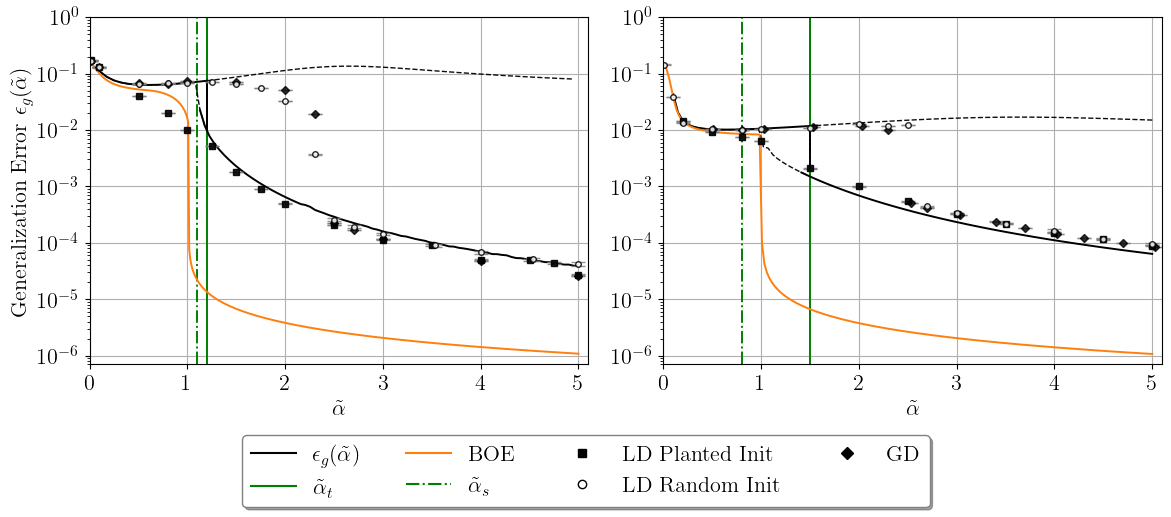

In [84]:
activ_function = ['relu', 'erf']

fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
error_color_bo = "tab:orange"
#markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'D', 'D']
alpha_list = np.linspace(1.0,0.8, 5)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = "Random Init "
LD_name_init_planted = "Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.4
linewidth_theory_meta = 1.0

linewidth_theory_vertical = linewidth_theory
fontsize=13
color_num="white"
color_num_planted="orange"
vertical_line_color="green" #"magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []
plot_activ_function=True
GD_exist = True
GD_indice = 4
#1.235, 1.12




planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'erf':1.5, 'relu':1.2}
alpha_first_t = {'erf':0.8, 'relu':1.1}

with_overlap = False
name_file_pdf = f"zeroTermperature_erf_relu_with_overlap_{with_overlap}"

# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
#alpha_first_t = 0.85
y1_max=1.0
y1_min=-0.01
y_min=7*1e-7
y_max=1e0
x_min=0.2
x_max=5.1

yline = np.linspace(y_min, y_max, 900)  # Define y-axis range

colors = np.where(yline < 0.2, vertical_line_color, np.where(yline < 0.4, error_color, vertical_line_color))

vertical_line = {"erf":[1e-3+1.19e-4, 1e-2], "relu":[1e-2, 1e-1-0.02]}
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})
#ax1.set_xlabel(r'$\tilde{\alpha}$')
#ax1.set_ylabel(r'$\epsilon_g$')
# -- Transition -- 
#plt.axvline(12.23, color= 'lightgray')

# Plot on ax1 - ERROR
# -- non specialized sol -- 
for i, key in enumerate(activ_function):
    
    alpha_t = alpha_t_list[key]
    print(key,alpha_t)
    x_ticks = np.arange(0, 6, 1)
    
    
    
    
    if len(activ_function)>1: 
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
        
    #Limit
    ax1.set_xlim(x_min, x_max)
    
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g (\tilde{\alpha})$')
    #ax1.axvline(alpha_t, color=vertical_line_color, linewidth=linewidth_theory)
    #treshold_
    
    colors = np.where(yline <= vertical_line[key][0], vertical_line_color, np.where(yline <=  vertical_line[key][1],
                                                                                                 error_color, vertical_line_color))
    for i in range(len(yline) - 1):
        ax1.plot([alpha_t, alpha_t], [yline[i], yline[i + 1]], color=colors[i], linewidth=linewidth_theory_vertical)

    #THEORY 
    Th_directory = f"{key}_betainf_lambda0p01/Theory/"
    
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
    error_bo = pd.read_csv(Th_directory+'Error_BO.txt', names=colse, header=None)

    if key=="erf":
        TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
     
    #First phse transition   
    ax1.axvline(alpha_first_t[key], color=vertical_line_color, linestyle='-.', linewidth=linewidth_theory)

    
     



    # EXPERIMENTS
    Ex_directory = f"{key}_betainf_lambda0p01/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt', names=colsN, header=None,sep=' ')

    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]<alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]<alpha_t], '-', color='k')
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]>alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]>alpha_t], '--', color='gray')


    # -- specialized sol -- 
    #(unstable_error,) = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_memo])
    if key=="relu" and plot_activ_function:
        error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None)
        error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)

        
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t - 0.09],  error_1['val'][error_1[xvar]>alpha_t - 0.09], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t + 0.01],  error_0['val'][error_0[xvar]<alpha_t  + 0.01], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        
    elif key=="relu":
        spe_error = ax1.semilogy([],  [], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        
    elif key=="erf":
        error_0 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)
        error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)
        
        #error_2 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)
        
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t - 0.12],  error_1['val'][error_1[xvar]>alpha_t - 0.12], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t + 0.08],  error_0['val'][error_0[xvar]<alpha_t  + 0.08], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
    error_bo_plt = ax1.semilogy(error_bo[xvar], 0.5*error_bo['val'], color=error_color_bo, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)


    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], 0.5*error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], 0.5*error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    error_random = ax1.errorbar(error_random['alpha'], 0.5*error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    

    ax1.tick_params(axis='y')
    
    if i == 0:
        ax1.set_ylabel(r'Generalization Error$ \epsilon_g(\tilde{\alpha}))$') #,fontsize=fontsize)
        
    #ax1.text(0.05, 0.95, f'({chr(97+i)})', transform=ax1.transAxes, 
    #            fontsize=14, va='top')
    

    #ADD Overlap on the plot
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        ax2.set_ylim(y1_min, y1_max)
        ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$') #,fontsize=fontsize)
            

        # -- specialized sol -- 
        if key=="relu":
            spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'] + TS_1['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
            spe_off_overlap = ax2.plot(TS_1[xvar], TS_1['m1'] / k, markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            overlap_max_list.append(max(TS_1['m0'] + TS_1['m1'] / k))
            overlap_min_list.append(min(TS_1['m1'] / k))
            
        elif key=="erf":
            spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t], TS_1['m0'][TS_1[xvar]>alpha_t] + TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                        markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t], TS_1['m0'][TS_1[xvar]<alpha_t] + TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                        markers[theo_indice_meta], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t], TS_0['m0'][TS_0[xvar]<alpha_t] + TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                                markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m0'][TS_0[xvar]>alpha_t] + TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                                markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            
            
            spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t],TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                        markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t],TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                        markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t],TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                                markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                                markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            
            overlap_max_list.append(max([max(TS_1['m0'] + TS_1['m1'] / k), max(TS_0['m0'] + TS_0['m1'] / k)]))
            overlap_min_list.append(min([min(TS_1['m0'] + TS_1['m1'] / k), min(TS_0['m0'] + TS_0['m1'] / k)]))
            
            
        


        # -- experiments --
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)



        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)

        
        ax2.tick_params(axis='y')
        
        if key=="erf":
                legend_elements.append((spe_error_3, f'{branch_name_after_metastable} ($ε_g$)'))
                legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
                legend_elements.append((unstable_diag_overlap, r'{}  $m_d$'.format(branch_name_after_metastable)))

        
        if i == 0:
            legend_elements.append((spe_error, f'{branch_name_after_stable}($ε_g$)'))
            legend_elements.append((error_planted, f'{LD_name_init_planted} ($ε_g$)')) 
            legend_elements.append((error_random, f'{LD_name_init_random} ($ε_g$)'))
            
            
            #legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            legend_elements.append((spe_diag_overlap, r'{} $m_d$'.format(branch_name_after_stable)))
            legend_elements.append((spe_off_overlap, r'{} $m_a$'.format(branch_name_after_stable)))
            
            legend_elements.append((planted_diag_overlap, r'{} $m_d$'.format(LD_name_init_planted)))
            legend_elements.append((random_diag_overlap, r'{} $m_d$'.format(LD_name_init_random)))
            legend_elements.append((planted_off_overlap, r'{} $m_a$'.format(LD_name_init_planted)))
            legend_elements.append((random_off_overlap, r'{} $m_a$'.format(LD_name_init_random)))
        
    ax1.set_xlabel(r'$\tilde{\alpha}$') #, fontsize=fontsize)
    ax1.set_label("")
    ax1.set_xticks(x_ticks)
    ax1.grid(True)
    ax2.grid(True)
    
    


#ax2.tick_params(axis='y')
if with_overlap:
    legend_handles = [
        mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g(\tilde{\alpha})$'),
        mlines.Line2D([], [], color=diag_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_d$'),
        mlines.Line2D([], [], color=off_ts_color, linestyle=markers[theo_indice_spe], label=r' $m_a$'),
        mlines.Line2D([], [], color=vertical_line_color, linestyle='-', label=r' $\tilde{\alpha}_t$'),
        mlines.Line2D([], [], color=vertical_line_color, linestyle='-.', label=r' $\tilde{\alpha}_s$'),
        mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
        mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
        mlines.Line2D([], [], color="gray",markeredgecolor="gray", marker=markers[GD_indice], linestyle='None', label=r'GD')
    ] 
elif not  with_overlap:
    legend_handles = [
        mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g (\tilde{\alpha})$'),
        mlines.Line2D([], [], color=vertical_line_color, linestyle='-', label=r' $\tilde{\alpha}_t$'),
        mlines.Line2D([], [], color=error_color_bo, linestyle='-', label=r'BOE'),
        mlines.Line2D([], [], color=vertical_line_color, linestyle='-.', label=r' $\tilde{\alpha}_s$'),
        mlines.Line2D([], [], color=error_color, markeredgecolor=error_color, marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
        mlines.Line2D([], [], color=color_num,markeredgecolor=error_color, marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
        mlines.Line2D([], [], color=error_color,markeredgecolor=error_color, marker=markers[GD_indice], linestyle='None', label=r'GD')
    ] 


    

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)

# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

#plt.legend(handles, labels, ncol=3, frameon=True, loc='right', bbox_to_anchor=(0.99, 0.84))

# Legend outside the plot, centered below
legend = fig.legend(
    handles, 
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=4,
    frameon=True,
    shadow=True,
    fancybox=True
)
legend.get_frame().set_edgecolor('gray')

# Layout and show
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Adjust layout (ensure this is after legend creation)
#fig.tight_layout()

# Save figure
plt.savefig(f"{name_file_pdf}_new.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
hjhjhjhj

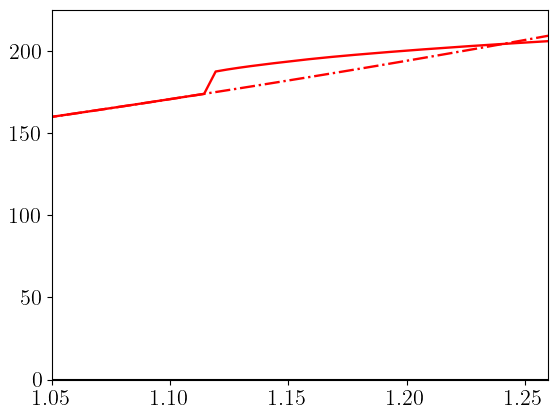

In [47]:
yvar= 'FEn'
xvar="alpha"
key="relu"
#THEORY 
Th_directory = f"{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
plt.xlim(1.05,1.26)
plt.ylim(0,225)
plt.axvline(12.23, color='tab:blue')
#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_98137/4161548786.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,0.02)


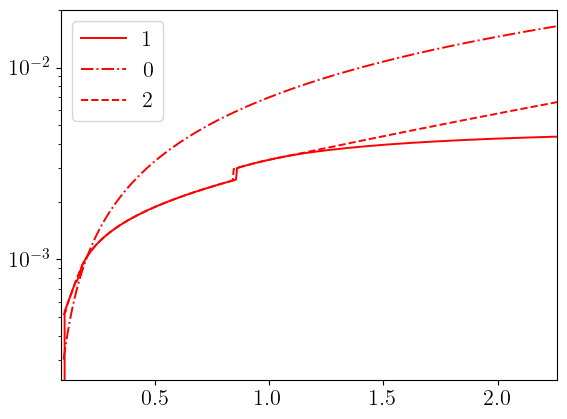

In [83]:
yvar= 'FEn'
xvar="alpha"
key="erf"
#THEORY 
Th_directory = f"{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)

plt.semilogy(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory,label=f'{1}')
plt.semilogy(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory,label=f'{0}')
plt.semilogy(TS_2[xvar], -TS_2[yvar] , '--', color=diag_ts_color, linewidth=linewidth_theory,label=f'{2}')


#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
plt.xlim(0.09,2.26)
plt.ylim(0,0.02)
plt.axvline(12.23, color='tab:blue')

#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12
plt.legend()
plt.show()

(0.5, 1.82)

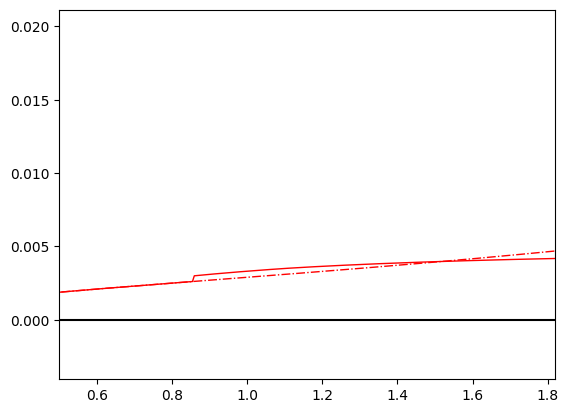

In [23]:
yvar= 'FEn'
xvar="alpha"
key="erf"
#THEORY 
Th_directory = f"{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_3 = pd.read_csv(Th_directory+'TS_3.txt', names=cols, header=None)
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)

plt.axvline(0.204, color='tab:blue')
plt.axvline(0.1045, color='tab:orange')
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_2[xvar], -TS_2[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_3[xvar], -TS_3[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
#plt.ylim(0.0,0.005)
plt.xlim(0.5,1.82)


#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

In [112]:
'quadratic_beta10_lambda0p1/Theory/TS_2.txt'

'quadratic_beta10_lambda0p1/Theory/TS_2.txt'

In [113]:
f"{Th_directory}"+'TS_2.txt'

'quadratic_beta10_lambda0p01/Theory/TS_2.txt'

(0.5, 1.82)

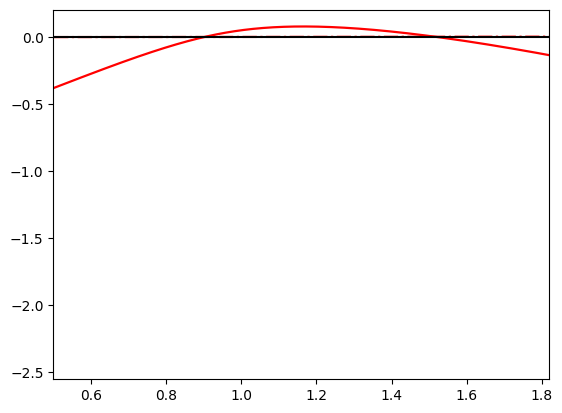

In [120]:
#yvar= ['FEn','ts_overlap','ss_overlap']
yvar= 'FEn'
xvar="alpha"
key="quadratic"
#THEORY 
Th_directory = f"{key}_beta10_lambda0p1/Theory/"

# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)

plt.axvline(0.204, color='tab:blue')
plt.axvline(0.1045, color='tab:orange')
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_2[xvar], -TS_2[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_3[xvar], -TS_3[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
#plt.ylim(0.0,0.005)
plt.xlim(0.5,1.82)


#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

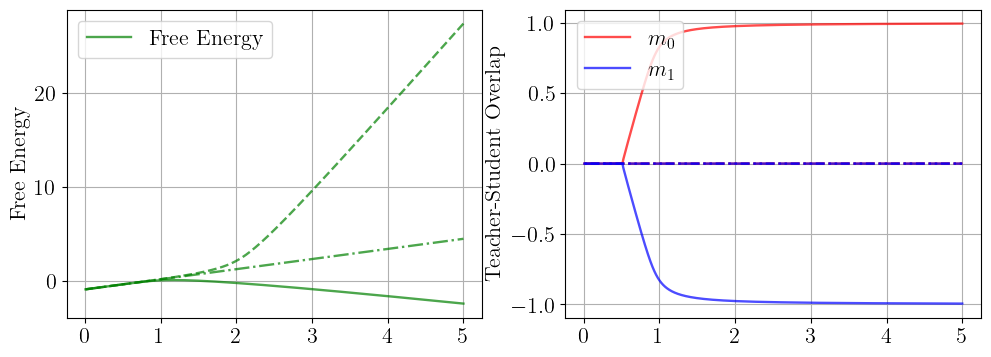

In [63]:
observables= ['Free Energy','Teacher-Student Overlap']
figsize=(11.8,4)

fig, axes = plt.subplots(1,len(observables),figsize=figsize)
dict_observable = {'Free Energy':['FEn'],'Teacher-Student Overlap':['m0','m1'], 'Student-Student Overlap':['q0','q1'],"Difference Student-Student Overlap": ['V0','V1'] }
yvar= 'FEn'
xvar="alpha"
key="quadratic"
markers = ['-.','-','--']
alpha_list = np.linspace(0.4,1,3)[::-1]


#THEORY 
Th_directory = f"{key}_beta10_lambda0p1/Theory/"
# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
K=10
colors= ["red",'blue',"green"]
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})

for i , observable in enumerate(observables):
    

    for p in range(len(dict_observable[observable])):
        if observable=="Free Energy":
            color = colors[-1]
            axes[i].plot(TS_0[xvar], -TS_0[dict_observable[observable][p]], 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], -TS_1[dict_observable[observable][p]], 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"{observable}")
            axes[i].plot(TS_2[xvar], -TS_2[dict_observable[observable][p]], 
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].set_ylabel(f"{observable}")
            #axes[i].set_xlabel(r"$\tilde{\alpha}$")

        else:
            color=colors[p]
            axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]], 
                                                markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]], 
                                                markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_{p}$")
            axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]], 
                                                markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                
            axes[i].set_ylabel(f"{observable}")
    #axes[i].set_xlabel(r"$\tilde{\alpha}$")
    axes[i].legend() #fontsize=fontsize)
    axes[i].grid(True)
    
plt.legend()
name_file_pdf2 = "Free_energy_overlap_student"
plt.savefig(f"{name_file_pdf2}_new.pdf", bbox_inches='tight', dpi=300)
plt.show()

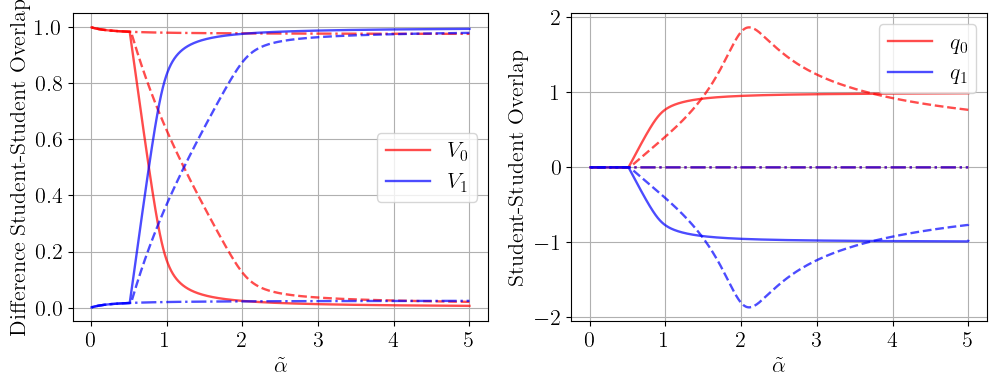

In [64]:
observables= ["Difference Student-Student Overlap",'Student-Student Overlap',]

fig, axes = plt.subplots(1,len(observables),figsize=figsize)
dict_observable = {'Free Energy':['FEn'],'Teacher-Student Overlap':['m0','m1'], 'Student-Student Overlap':['q0','q1'],"Difference Student-Student Overlap": ['V0','V1'] }
yvar= 'FEn'
xvar="alpha"
key="quadratic"
markers = ['-.','-','--']

#THEORY 
Th_directory = f"{key}_beta10_lambda0p1/Theory/"
# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
K=10
colors= ["red",'blue',"green"]
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})
for i , observable in enumerate(observables):
    

    for p in range(len(dict_observable[observable])):
        if observable=="Free Energy":
            color = colors[-1]
            axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]], 
                                                 markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]], 
                                                 markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_{p}$")
            axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]], 
                                                 markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)
        else:
            color=colors[p]
            
            axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]], 
                                                markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]], 
                                                markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_{p}$")
            axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]], 
                                                markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            
        axes[i].set_ylabel(f" {observable} ")
    axes[i].set_xlabel(r"$\tilde{\alpha}$")
    axes[i].legend() #fontsize=fontsize)
    axes[i].grid(True)
plt.legend()
name_file_pdf2 = "overlap_student_ts_overlap"
plt.savefig(f"{name_file_pdf2}_new.pdf", bbox_inches='tight', dpi=300)
plt.show()

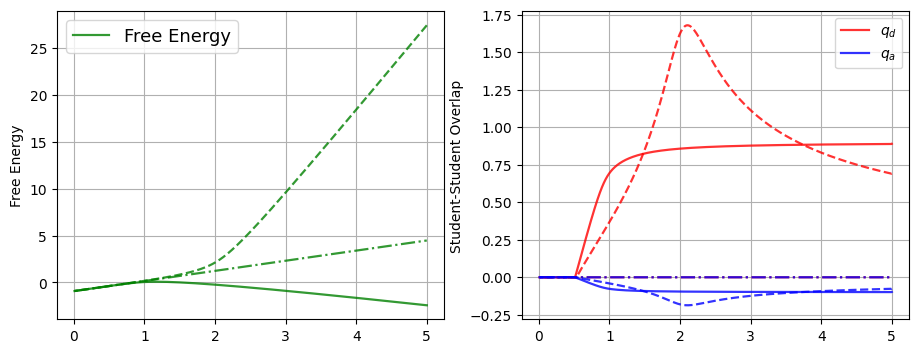

In [204]:
observables= ['Free Energy','Student-Student Overlap']
figsize=(11,4)

fig, axes = plt.subplots(1,len(observables),figsize=figsize)
dict_observable = {'Free Energy':['FEn'],'Teacher-Student overlap':['m0','m1'], 'Student-Student Overlap':['q0','q1'],"difference Student-Student Overlap": ['V0','V1'] }
yvar= 'FEn'
xvar="alpha"
key="quadratic"
markers = ['-.','-','--']
alpha_list = np.linspace(0.6,1,3)[::-1]


#THEORY 
Th_directory = f"{key}_beta10_lambda0p1/Theory/"
# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
K=10
colors= ["red",'blue',"green"]

for i , observable in enumerate(observables):
    

    for p in range(len(dict_observable[observable])):
        if observable=="Free Energy":
            color = colors[-1]
            axes[i].plot(TS_0[xvar], -TS_0[dict_observable[observable][p]], 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], -TS_1[dict_observable[observable][p]], 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"{observable}")
            axes[i].plot(TS_2[xvar], -TS_2[dict_observable[observable][p]], 
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            axes[i].set_ylabel(observable)
            #axes[i].set_xlabel(r"$\tilde{\alpha}$")

        else:
            color=colors[p]
            if p==1:
                axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]]/K, 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]]/K, 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_a$")
                axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]]/K, 
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            else:
                axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]]+TS_0[dict_observable[observable][p+1]]/K, 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]]+TS_1[dict_observable[observable][p+1]]/K, 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_d$")
                axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]]+TS_2[dict_observable[observable][p+1]]/K,
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                
            axes[i].set_ylabel(observable)
    #axes[i].set_xlabel(r"$\tilde{\alpha}$")
    axes[i].legend(fontsize=fontsize)
    axes[i].grid(True)
    
plt.legend()
name_file_pdf2 = "Free_energy_overlap_student"
plt.savefig(f"{name_file_pdf2}.pdf", bbox_inches='tight', dpi=300)
plt.show()

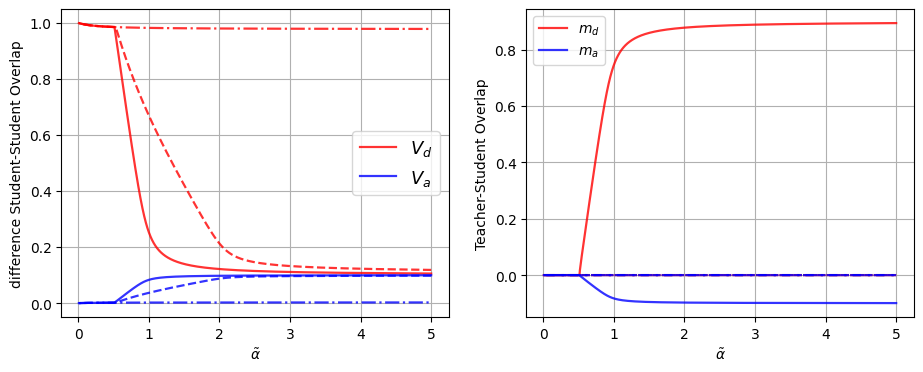

In [205]:
observables= ["difference Student-Student Overlap",'Teacher-Student Overlap']

fig, axes = plt.subplots(1,len(observables),figsize=figsize)
dict_observable = {'Free Energy':['FEn'],'Teacher-Student Overlap':['m0','m1'], 'SS Overlap':['q0','q1'],"difference Student-Student Overlap": ['V0','V1'] }
yvar= 'FEn'
xvar="alpha"
key="quadratic"
markers = ['-.','-','--']

#THEORY 
Th_directory = f"{key}_beta10_lambda0p1/Theory/"
# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
K=10
colors= ["red",'blue',"green"]

for i , observable in enumerate(observables):
    

    for p in range(len(dict_observable[observable])):
        if observable=="Free_Energy":
            color = colors[-1]
            axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]], 
                                                 markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]], 
                                                 markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_{p}$")
            axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]], 
                                                 markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)
        else:
            color=colors[p]
            if p==1:
                axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]]/K, 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]]/K, 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_a$")
                axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]]/K, 
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
            else:
                axes[i].plot(TS_0[xvar], TS_0[dict_observable[observable][p]]+TS_0[dict_observable[observable][p+1]]/K, 
                                                 markers[0], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
                axes[i].plot(TS_1[xvar], TS_1[dict_observable[observable][p]]+TS_1[dict_observable[observable][p+1]]/K, 
                                                 markers[1], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory,label=f"${dict_observable[observable][p][0]}_d$")
                axes[i].plot(TS_2[xvar], TS_2[dict_observable[observable][p]]+TS_2[dict_observable[observable][p+1]]/K,
                                                 markers[2], color=color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)
        axes[i].set_ylabel(observable)
    axes[i].set_xlabel(r"$\tilde{\alpha}$")
    axes[i].legend(fontsize=fontsize)
    axes[i].grid(True)
plt.legend()
name_file_pdf2 = "overlap_student_ts_overlap"
plt.savefig(f"{name_file_pdf2}.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
k = 10
cols=['alpha', 'm0'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

activ_function = ['relu'] #,'sign']
m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'D', 'D']
alpha_list = np.linspace(1.0,0.8, 5)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = "Random Init "
LD_name_init_planted = "Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.7
linewidth_theory_vertical = linewidth_theory
fontsize=13
color_num="white"
color_num_planted="orange"
#vertical_line_color="magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []
plot_activ_function=True
GD_exist = True
GD_indice = 4
#1.235, 1.12



planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'erf':1.5, 'relu':1.2}
alpha_first_t = {'erf':0.8, 'relu':1.1}

with_overlap = False
name_file_pdf = f"zeroTermperature_relu_sign_classification_with_overlap_{with_overlap}"

# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
#alpha_first_t = 0.85
y1_max=1.0
y1_min=-0.01
y_min=1.1e-2
y_max=1e0
x_min=0.2
x_max=15.1

#yline = np.linspace(y_min, y_max, 900)  # Define y-axis range

#colors = np.where(yline < 0.2, vertical_line_color, np.where(yline < 0.4, error_color, vertical_line_color))

#vertical_line = {"erf":[1e-3+1.19e-4, 1e-2], "relu":[1e-2, 1e-1-0.02]}
#ax1.set_xlabel(r'$\tilde{\alpha}$')
#ax1.set_ylabel(r'$\epsilon_g$')
# -- Transition -- 
#plt.axvline(12.23, color= 'lightgray')

# Plot on ax1 - ERROR
# -- non specialized sol -- 

GD


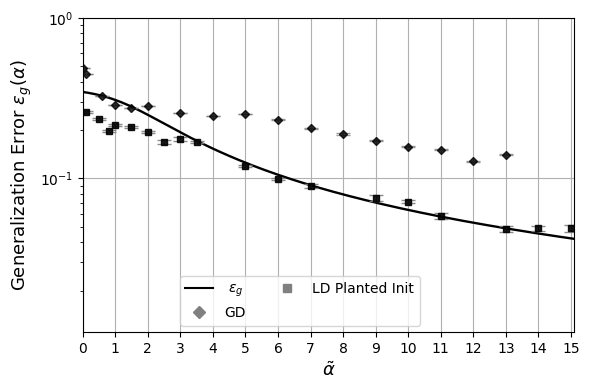

In [27]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(6, 4))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

for i, key in enumerate(activ_function):
    
    x_ticks = np.arange(0, x_max, 1)
    if len(activ_function)>1:
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
    else:
        ax1=axes
        ax1.set_ylim(y_min, y_max)
        
    #Limit x-axis
    ax1.set_xlim(x_min, x_max)
    
    # Add Generalization error
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
        
    #THEORY 
    root="betainf_lambda0p0classification"
    Th_directory = f"{key}_{root}/Theory/"
        
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None, sep=' ')
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None, sep=' ')
    
    
    # EXPERIMENTS
    Ex_directory = f"{key}_{root}/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt',sep=' ', names=colsN, header=None)
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt',sep=' ', names=colsN, header=None)
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt',sep=' ', names=colsN, header=None)

    
    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    
    #Theoretical Data
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None,sep=' ')
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None,sep=' ')
    spe_error = ax1.semilogy(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.semilogy(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error = ax1.plot(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.plot(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    
    
    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    #error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
    #                            capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    
    
    ax1.tick_params(axis='y')
    if i == 0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g(\alpha)$',fontsize=fontsize)
        
    
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        #ax2.set_ylim(y1_min, y1_max)
        #ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$',fontsize=fontsize)
        
        # -- specialized sol -- 
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'], '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
            
        
        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        
        if i == 0:
            legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($ε_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            
    ax1.set_xlabel(r'$\tilde{\alpha}$', fontsize=fontsize)
    ax1.set_label("")
    ax1.set_xticks(x_ticks)
    ax1.grid(True)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)


legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g$'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[GD_indice], linestyle='None', label=r'GD'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    #mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]


# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

plt.legend(handles, labels, ncol=2, frameon=True, loc='right', bbox_to_anchor=(0.7, 0.1))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

# Save figure
#plt.savefig(f"{name_file_pdf}_classification.pdf", bbox_inches='tight', dpi=300)
plt.show()

<>:120: SyntaxWarning: invalid escape sequence '\e'
<>:120: SyntaxWarning: invalid escape sequence '\e'
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_845/866250819.py:120: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($\epsilon_g$)'))


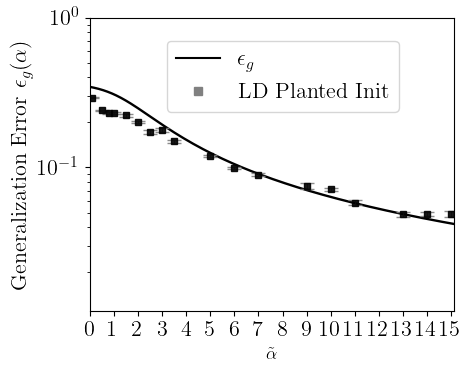

In [8]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(5, 4))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})
GD_exist=False
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})

for i, key in enumerate(activ_function):
    
    x_ticks = np.arange(0, x_max, 1)
    if len(activ_function)>1:
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
    else:
        ax1=axes
        ax1.set_ylim(y_min, y_max)
        
    #Limit x-axis
    ax1.set_xlim(x_min, x_max)
    
    # Add Generalization error
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
        
    #THEORY 
    root="betainf_lambda0p0classification"
    Th_directory = f"{key}_{root}/Theory/"
        
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None, sep=' ')
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None, sep=' ')
    
    
    # EXPERIMENTS
    Ex_directory = f"{key}_{root}/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt',sep=' ', names=colsN, header=None)
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt',sep=' ', names=colsN, header=None)
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt',sep=' ', names=colsN, header=None)

    
    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    
    #Theoretical Data
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None,sep=' ')
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None,sep=' ')
    spe_error = ax1.semilogy(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.semilogy(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error = ax1.plot(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.plot(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    
    
    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    #error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
    #                            capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    
    
    ax1.tick_params(axis='y')
    if i == 0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g(\alpha)$')
        
    
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        #ax2.set_ylim(y1_min, y1_max)
        #ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$',fontsize=fontsize)
        
        # -- specialized sol -- 
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'], '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
            
        
        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        
        if i == 0:
            legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($\epsilon_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            
    ax1.set_xlabel(r'$\tilde{\alpha}$', fontsize=fontsize)
    ax1.set_label("")
    ax1.set_xticks(x_ticks)
    #ax1.grid(True)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)


legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g$'),
    #mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[GD_indice], linestyle='None', label=r'GD'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    #mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]


# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

plt.legend(handles, labels, ncol=1, frameon=True, loc='right', bbox_to_anchor=(0.88, 0.8))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

# Save figure
plt.savefig(f"{name_file_pdf}_classification.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [17]:
#plt.savefig(f"{name_file_pdf}_classification.pdf", bbox_inches='tight', dpi=300)
name_file_pdf

'zeroTermperature_relu_sign_classification_with_overlap_False'

GD


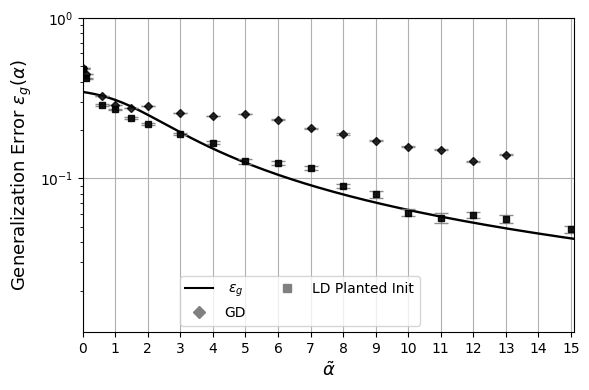

In [19]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(6, 4))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})

for i, key in enumerate(activ_function):
    
    x_ticks = np.arange(0, x_max, 1)
    if len(activ_function)>1:
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
    else:
        ax1=axes
        ax1.set_ylim(y_min, y_max)
        
    #Limit x-axis
    ax1.set_xlim(x_min, x_max)
    
    # Add Generalization error
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
        
    #THEORY 
    root="betainf_lambda0p0classification"
    Th_directory = f"{key}_{root}/Theory/"
        
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None, sep=' ')
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None, sep=' ')
    
    
    # EXPERIMENTS
    Ex_directory = f"{key}_{root}/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt',sep=' ', names=colsN, header=None)
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt',sep=' ', names=colsN, header=None)
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt',sep=' ', names=colsN, header=None)

    
    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    
    #Theoretical Data
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None,sep=' ')
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None,sep=' ')
    spe_error = ax1.semilogy(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.semilogy(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error = ax1.plot(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.plot(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    
    
    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    #error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
    #                            capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    
    
    ax1.tick_params(axis='y')
    if i == 0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g(\alpha)$',fontsize=fontsize)
        
    
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        #ax2.set_ylim(y1_min, y1_max)
        #ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$',fontsize=fontsize)
        
        # -- specialized sol -- 
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'], '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
            
        
        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        
        if i == 0:
            legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($ε_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            
    ax1.set_xlabel(r'$\tilde{\alpha}$', fontsize=fontsize)
    ax1.set_label("")
    ax1.set_xticks(x_ticks)
    ax1.grid(True)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)


legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g$'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[GD_indice], linestyle='None', label=r'GD'),
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    #mlines.Line2D([], [], color=color_num,markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]


# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

plt.legend(handles, labels, ncol=2, frameon=True, loc='right', bbox_to_anchor=(0.7, 0.1))

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

# Save figure
#plt.savefig(f"{name_file_pdf}_classification.pdf", bbox_inches='tight', dpi=300)
plt.show()